### Analysis of the Stack overflow interaction network

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from model import *

##### Running the models

In [26]:
# Run the model in the default setting

# Number of new users added to the network every timestep
n = 250

# Normal distribution for P_upvote
stackoverflow = network(n, 'tags.txt')
stackoverflow.run(20)

# Exponential distribution for P_upvote
stackoverflow_exp = network(n, 'tags.txt', distr=[[0.5, 0.25], [0.5, 0.25], [3, None], [0.5, 0.25]])
stackoverflow_exp.run(20)

##### Extracting data from the models

In [28]:
# Extract the data about the number of upvotes given by users and their reputation using the normal distribution
pdf_upvote, bins_upvote = stackoverflow.get_upvote_distr(binsize=5)
pdf_rep, bins_rep = stackoverflow.get_reputation_distr(binsize=125)

# Calculate the log of the data
pdf_upvote_log = []
bins_upvote_log = []

for ind, value in enumerate(pdf_upvote):
    if value != 0:
        bins_upvote_log.append(np.log10(bins_upvote[ind]))
        pdf_upvote_log.append(np.log10(value))

pdf_reputation_log = []
bins_reputation_log = []

for ind, value in enumerate(pdf_rep):
    if value != 0:
        bins_reputation_log.append(np.log10(bins_rep[ind]))
        pdf_reputation_log.append(np.log10(value))

In [29]:
# Extract the data about the number of upvotes given by users and their reputation using the exponential distribution
pdf_upvote_exp, bins_upvote_exp = stackoverflow_exp.get_upvote_distr(binsize=5)
pdf_rep_exp, bins_rep_exp = stackoverflow_exp.get_reputation_distr(binsize=125)

# Calculate the log of the data
pdf_upvote_log_exp = []
bins_upvote_log_exp = []

for ind, value in enumerate(pdf_upvote_exp):
    if value != 0:
        bins_upvote_log_exp.append(np.log10(bins_upvote_exp[ind]))
        pdf_upvote_log_exp.append(np.log10(value))

pdf_reputation_log_exp = []
bins_reputation_log_exp = []

for ind, value in enumerate(pdf_rep_exp):
    if value != 0:
        bins_reputation_log_exp.append(np.log10(bins_rep_exp[ind]))
        pdf_reputation_log_exp.append(np.log10(value))

##### Fitting the data

In [59]:
# Linear fitting (Normal)
lin_model_upvote = LinearRegression().fit(np.array(bins_upvote_log)[5:-900].reshape((-1, 1)), pdf_upvote_log[5:-900])
lin_model_reputation = LinearRegression().fit(np.array(bins_reputation_log)[5:-200].reshape((-1, 1)), pdf_reputation_log[5:-200])

y_upvote_fit = lin_model_upvote.predict(np.array(bins_upvote_log).reshape((-1, 1)))
y_reputation_fit = lin_model_reputation.predict(np.array(bins_reputation_log).reshape((-1, 1)))

# Linear fitting (Exponential)
lin_model_upvote_exp = LinearRegression().fit(np.array(bins_upvote_log_exp)[2:-500].reshape((-1, 1)), pdf_upvote_log_exp[2:-500])
lin_model_reputation_exp = LinearRegression().fit(np.array(bins_reputation_log_exp)[:-200].reshape((-1, 1)), pdf_reputation_log_exp[:-200])

y_upvote_fit_exp = lin_model_upvote_exp.predict(np.array(bins_upvote_log_exp).reshape((-1, 1)))
y_reputation_fit_exp = lin_model_reputation_exp.predict(np.array(bins_reputation_log_exp).reshape((-1, 1)))

print('Normal distribution for P(upvote)', lin_model_upvote.coef_, lin_model_reputation.coef_)
print('Exponential distribution for P(upvote)', lin_model_upvote_exp.coef_, lin_model_reputation_exp.coef_)

Normal distribution for P(upvote) [-0.94115048] [-0.9970739]
Exponential distribution for P(upvote) [-1.24086189] [-1.40163665]


In [60]:
# Fitting according to actual data

alpha = -2.5593
intercept = y_upvote_fit[0] - alpha * bins_upvote_log[0]
y_upvote_act = []
for value in bins_upvote_log:
    y_upvote_act.append(alpha * value + intercept)

alpha = -0.77
intercept = y_reputation_fit[0] - alpha * bins_reputation_log[0]
y_reputation_act = []
for value in bins_reputation_log:
    y_reputation_act.append(alpha * value + intercept)

##### Plot

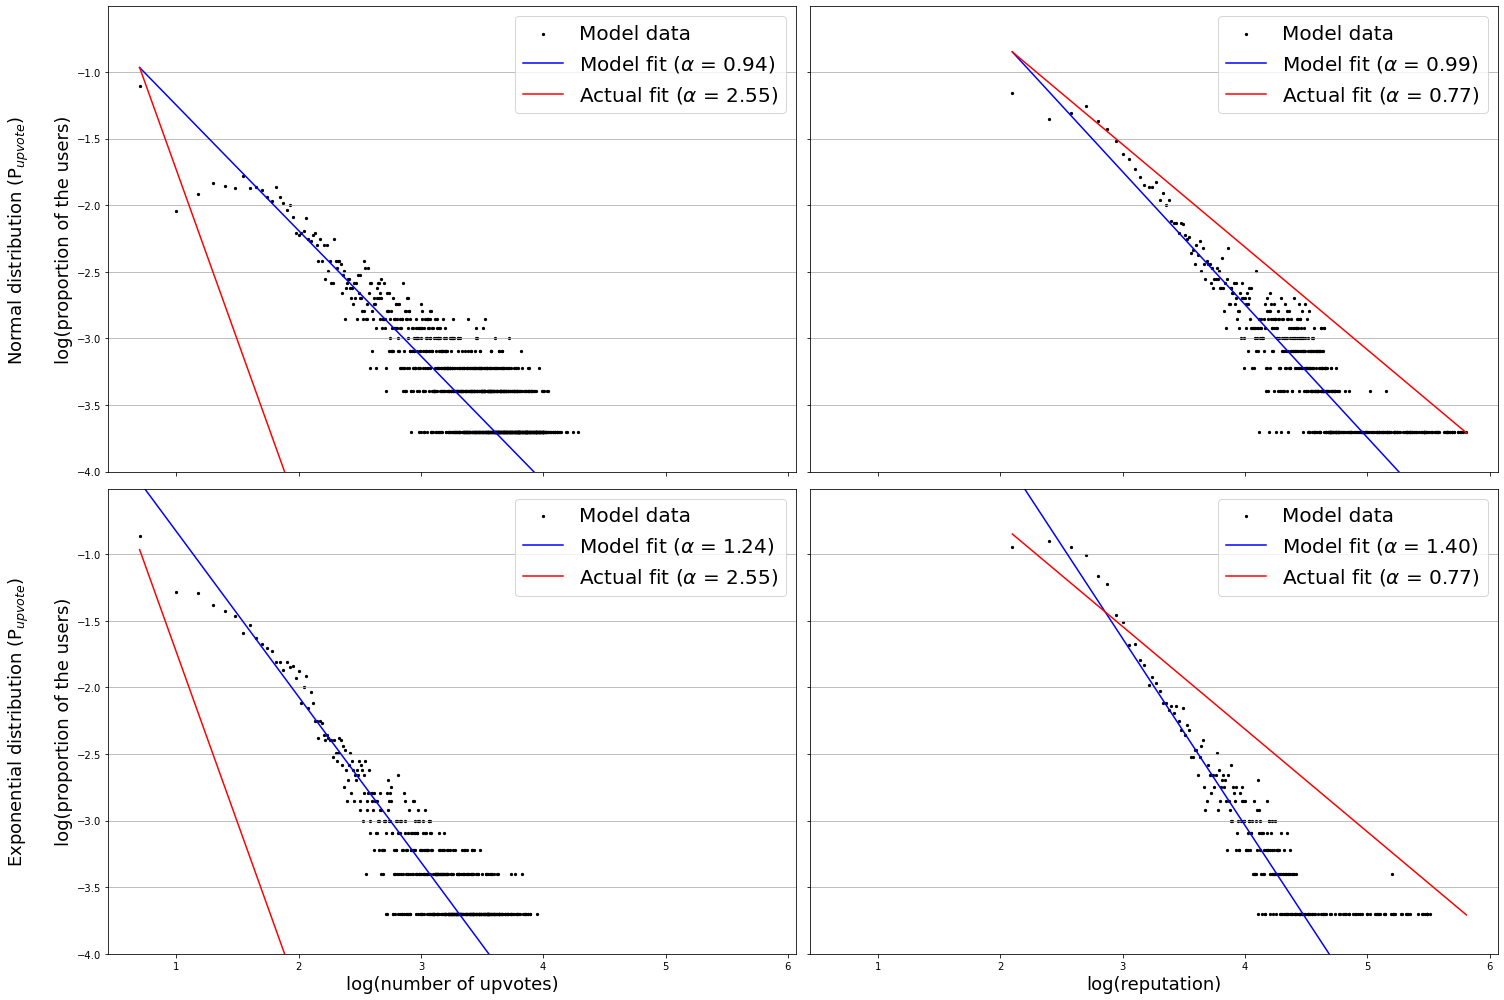

In [66]:
fig, axs = plt.subplots(2,2, figsize = (21,14), sharex=True, sharey=True)

axs[0][0].scatter(bins_upvote_log, pdf_upvote_log, color = 'black', s=5, label='Model data')
axs[0][0].plot(bins_upvote_log, y_upvote_fit, color = 'blue', label = r'Model fit ($\alpha$ = 0.94)')
axs[0][0].plot(bins_upvote_log, y_upvote_act, color = 'red', label = r'Actual fit ($\alpha$ = 2.55)')
axs[0][0].set_ylabel('Normal distribution (P$_{upvote}$)\n\nlog(proportion of the users)', fontsize=18)
axs[0][0].set_ylim(bottom=-4)
axs[0][0].legend(fontsize = 20)

axs[0][1].scatter(bins_reputation_log, pdf_reputation_log, color = 'black', s=5, label='Model data')
axs[0][1].plot(bins_reputation_log, y_reputation_fit, color = 'blue', label = r'Model fit ($\alpha$ = 0.99)')
axs[0][1].plot(bins_reputation_log, y_reputation_act, color = 'red', label = r'Actual fit ($\alpha$ = 0.77)')
axs[0][1].legend(fontsize = 20)

axs[1][0].scatter(bins_upvote_log_exp, pdf_upvote_log_exp, color = 'black', s=5, label='Model data')
axs[1][0].plot(bins_upvote_log_exp, y_upvote_fit_exp, color = 'blue', label = r'Model fit ($\alpha$ = 1.24)')
axs[1][0].plot(bins_upvote_log, y_upvote_act, color = 'red', label = r'Actual fit ($\alpha$ = 2.55)')
axs[1][0].set_xlabel('log(number of upvotes)', fontsize=18)
axs[1][0].set_ylabel('Exponential distribution (P$_{upvote}$)\n\nlog(proportion of the users)', fontsize=18)
axs[1][0].set_ylim(bottom=-4)
axs[1][0].legend(fontsize = 20)

axs[1][1].scatter(bins_reputation_log_exp, pdf_reputation_log_exp, color = 'black', s=5, label='Model data')
axs[1][1].plot(bins_reputation_log_exp, y_reputation_fit_exp, color = 'blue', label = r'Model fit ($\alpha$ = 1.40)')
axs[1][1].plot(bins_reputation_log, y_reputation_act, color = 'red', label = r'Actual fit ($\alpha$ = 0.77)')
axs[1][1].set_xlabel('log(reputation)', fontsize=18)
axs[1][1].legend(fontsize = 20)

for ax in axs.flat:
    ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('comparison_lit_3.pdf')
plt.show()

##### Dependence of interaction behaviour on community size

In [92]:
n_upvotes = [[] for _ in range(len(stackoverflow.tags))]
reputation = [[] for _ in range(len(stackoverflow.tags))]

for ind, tag in enumerate(stackoverflow.tags):
    for user_id in tag:
        reputation[ind].append(stackoverflow.users[user_id].reputation)
        n_upvotes[ind].append(stackoverflow.users[user_id].n_questions_upvoted + stackoverflow.users[user_id].n_answers_upvoted)

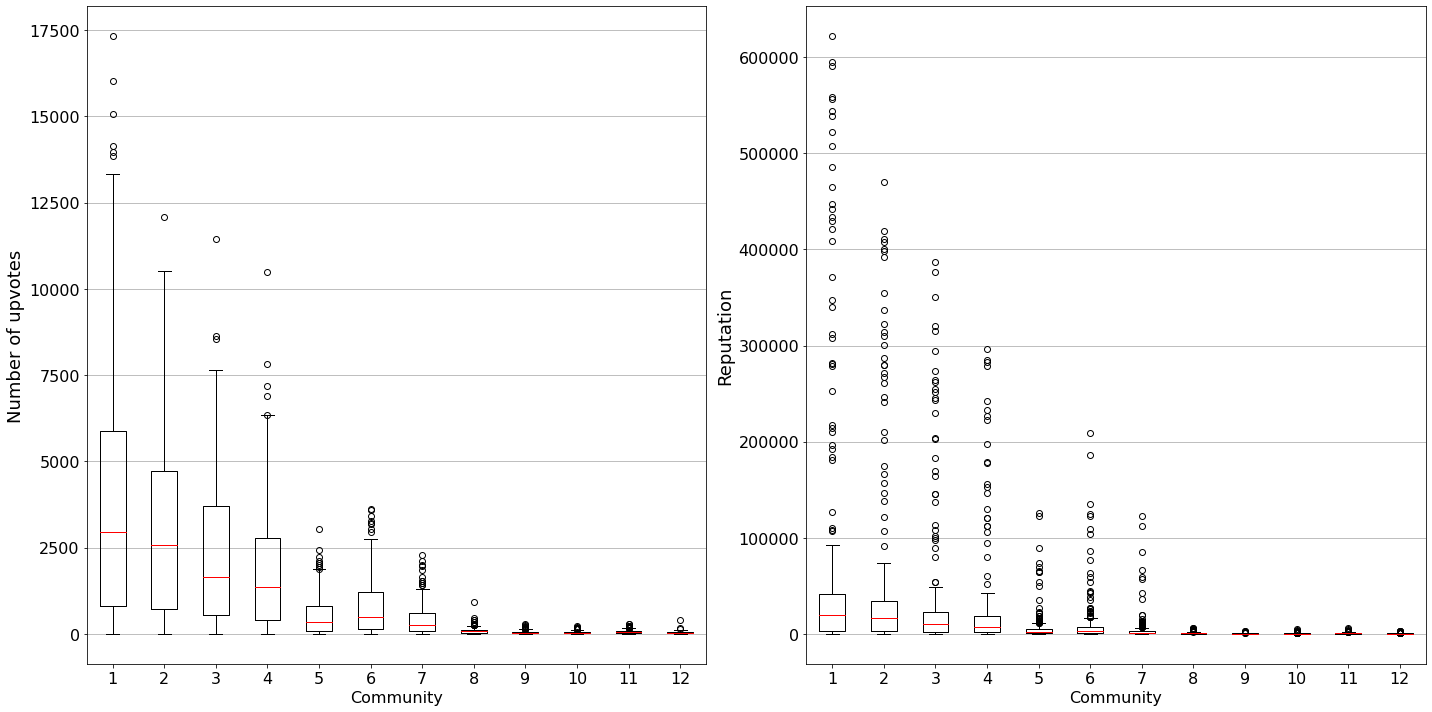

In [96]:
fig, axs = plt.subplots(1, 2, figsize = (20,10))

axs[0].tick_params(axis='both', labelsize = 16)
axs[1].tick_params(axis='both', labelsize = 16)

boxplot1 = axs[0].boxplot([n_upvotes[i] for i in range(len(n_upvotes))])
boxplot2 = axs[1].boxplot([reputation[i] for i in range(len(n_upvotes))])

axs[0].set_xlabel('Community', fontsize=16)
axs[1].set_xlabel('Community', fontsize=16)

axs[0].set_ylabel('Number of upvotes', fontsize=18)
axs[1].set_ylabel('Reputation', fontsize = 18)

for median in boxplot1['medians']:
    median.set_color('red')
for median in boxplot2['medians']:
    median.set_color('red')


for ax in axs:
    ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('communities.pdf')
plt.show()